In [3]:
!pip install sumy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 3.8 MB/s 
     |████████████████████████████████| 10.1 MB 39.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21711 sha256=02b4fe598d61910e2d975aa2c4a7e247377d2a9ec605def56c0bf43db4b9f82c
  Stored in directory: /root/.cache/pip/wheels/d4/bf/51/81d27ad638e1a6dca4f362ecc33d1e2c764b8ea7ec751b8fc1
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=51272fb25468f8f897b9b7d6677a72fb33b65045e184d54b481cbb6b3d05f280
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=aca318b55ec7bc2dcf999cdfdd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
import os
import pandas as pd
from collections import Counter
#wordcloud
from PIL import Image
import numpy
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#NLP Summarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

import nltk

from nltk.sentiment import SentimentIntensityAnalyzer

In [38]:
songs=os.listdir("/content/drive/MyDrive/1984-NLP/Data/1984 album Van Halen")

In [39]:
songs

['Jump.txt',
 'Girl Gone Bad.txt',
 'Top Jimmy.txt',
 'House of Pain.txt',
 'Drop Dead Legs.txt',
 'Hot for Teacher.txt',
 'Panama.txt',
 "I'll Wait.txt"]

In [40]:
album_corpus=[]

for lyrics in songs:
  with open("/content/drive/MyDrive/1984-NLP/Data/1984 album Van Halen"+"/"+lyrics,encoding="utf8") as f_input:
    album_corpus.append(f_input.read())


In [64]:
album_corpus

["[Verse 1]\nI get up and nothing gets me down\nYou got it tough, I've seen the toughest around\nAnd I know, baby, just how you feel\nYou gotta roll with the punches to get to what's real\n\n[Pre-Chorus]\nOh, can't you see me standing here?\nI got my back against the record machine\nI ain't the worst that you've seen\nOh, can't you see what I mean?\n\n[Chorus]\nAh, might as well jump (Jump!)\nMight as well jump\nGo ahead and jump (Jump!)\nGo ahead and jump\n\n[Verse 2]\nOh! Hey you! Who said that?\nBaby, how you been?\nYou say you don't know\nYou won't know until you begin\n\n[Pre-Chorus]\nSo can't you see me standing here?\nI've got my back against the record machine\nI ain't the worst that you've seen\nOh, can't you see what I mean?\n\n\n[Chorus]\nAh, might as well jump (Jump!)\nGo ahead and jump\nMight as well jump (Jump!)\nGo ahead and jump\nJump!\n\n[Guitar Solo]\n\n[Keyboard Solo]\n\n[Chorus]\nMight as well jump (Jump!)\nGo ahead and jump\nGet it and jump (Jump!)\nGo ahead and ju

In [63]:
album_word_list=[]

for lyrics in album_corpus:
  for word in lyrics.split():
    album_word_list.append(word)


album_word_list



['[Verse',
 '1]',
 'I',
 'get',
 'up',
 'and',
 'nothing',
 'gets',
 'me',
 'down',
 'You',
 'got',
 'it',
 'tough,',
 "I've",
 'seen',
 'the',
 'toughest',
 'around',
 'And',
 'I',
 'know,',
 'baby,',
 'just',
 'how',
 'you',
 'feel',
 'You',
 'gotta',
 'roll',
 'with',
 'the',
 'punches',
 'to',
 'get',
 'to',
 "what's",
 'real',
 '[Pre-Chorus]',
 'Oh,',
 "can't",
 'you',
 'see',
 'me',
 'standing',
 'here?',
 'I',
 'got',
 'my',
 'back',
 'against',
 'the',
 'record',
 'machine',
 'I',
 "ain't",
 'the',
 'worst',
 'that',
 "you've",
 'seen',
 'Oh,',
 "can't",
 'you',
 'see',
 'what',
 'I',
 'mean?',
 '[Chorus]',
 'Ah,',
 'might',
 'as',
 'well',
 'jump',
 '(Jump!)',
 'Might',
 'as',
 'well',
 'jump',
 'Go',
 'ahead',
 'and',
 'jump',
 '(Jump!)',
 'Go',
 'ahead',
 'and',
 'jump',
 '[Verse',
 '2]',
 'Oh!',
 'Hey',
 'you!',
 'Who',
 'said',
 'that?',
 'Baby,',
 'how',
 'you',
 'been?',
 'You',
 'say',
 'you',
 "don't",
 'know',
 'You',
 "won't",
 'know',
 'until',
 'you',
 'begin',
 '[

In [43]:
len(album_word_list)

1398

In [11]:
album_word_count_unique=Counter(album_word_list)

len(album_word_count_unique)

493

In [44]:
novel_corpus=[]

with open("/content/drive/MyDrive/1984-NLP/Data/1984-novel-George Orwell.txt",encoding="utf8") as f_input:
  novel_corpus.append(f_input.read())


In [45]:
novel_word_list=novel_corpus[0].split()

In [62]:
novel_word_list

['Title:',
 'Nineteen',
 'eighty-four',
 'Author:',
 'George',
 'Orwell',
 '(pseudonym',
 'of',
 'Eric',
 'Blair)',
 '(1903-1950)',
 'PART',
 'ONE',
 'Chapter',
 '1',
 'It',
 'was',
 'a',
 'bright',
 'cold',
 'day',
 'in',
 'April,',
 'and',
 'the',
 'clocks',
 'were',
 'striking',
 'thirteen.',
 'Winston',
 'Smith,',
 'his',
 'chin',
 'nuzzled',
 'into',
 'his',
 'breast',
 'in',
 'an',
 'effort',
 'to',
 'escape',
 'the',
 'vile',
 'wind,',
 'slipped',
 'quickly',
 'through',
 'the',
 'glass',
 'doors',
 'of',
 'Victory',
 'Mansions,',
 'though',
 'not',
 'quickly',
 'enough',
 'to',
 'prevent',
 'a',
 'swirl',
 'of',
 'gritty',
 'dust',
 'from',
 'entering',
 'along',
 'with',
 'him.',
 'The',
 'hallway',
 'smelt',
 'of',
 'boiled',
 'cabbage',
 'and',
 'old',
 'rag',
 'mats.',
 'At',
 'one',
 'end',
 'of',
 'it',
 'a',
 'coloured',
 'poster,',
 'too',
 'large',
 'for',
 'indoor',
 'display,',
 'had',
 'been',
 'tacked',
 'to',
 'the',
 'wall.',
 'It',
 'depicted',
 'simply',
 'an',

In [15]:
len(novel_word_list)

103377

In [16]:
len(Counter(novel_word_list))

15530

In [17]:
stop_words=list(get_stop_words("english"))
stop_words

["they'd",
 'want',
 'considering',
 'somebody',
 'does',
 'his',
 'out',
 'like',
 'used',
 'off',
 'into',
 'is',
 'thereby',
 'sent',
 "shan't",
 'itself',
 'welcome',
 'available',
 'p',
 'usually',
 "c's",
 'becoming',
 'know',
 'other',
 'down',
 'particular',
 'q',
 'enough',
 'take',
 'cannot',
 'nd',
 'seems',
 "we'll",
 'very',
 'also',
 'doing',
 'fifth',
 'see',
 'somewhere',
 'each',
 'saw',
 'unto',
 'done',
 'whole',
 'ourselves',
 'course',
 'have',
 'during',
 'latter',
 'really',
 'rather',
 'without',
 'tried',
 'regardless',
 "i've",
 'ignored',
 "they've",
 'knows',
 'sensible',
 'towards',
 'seven',
 'others',
 "didn't",
 'which',
 "it'll",
 'immediate',
 'serious',
 'obviously',
 'why',
 'apart',
 "a's",
 'b',
 'inasmuch',
 'mostly',
 'particularly',
 'at',
 'almost',
 'myself',
 'y',
 'our',
 "wasn't",
 'specified',
 'specify',
 'and',
 'known',
 'along',
 'etc',
 'was',
 'got',
 "it'd",
 "we're",
 'whereby',
 'j',
 'associated',
 'anyhow',
 "weren't",
 'in',
 '

In [46]:
clean_album_word_list=[]

for word in album_word_list:
  if word not in stop_words:
    clean_album_word_list.append(word)





In [47]:
frequency_of_clean_album_words=nltk.FreqDist(clean_album_word_list)
frequency_of_clean_album_words

FreqDist({'I': 37, '[Chorus]': 17, 'bad,': 16, 'bad': 15, "I'm": 15, 'hot': 13, '[Verse': 12, 'jump': 12, 'teacher': 12, 'Panama': 10, ...})

In [48]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (14,5)

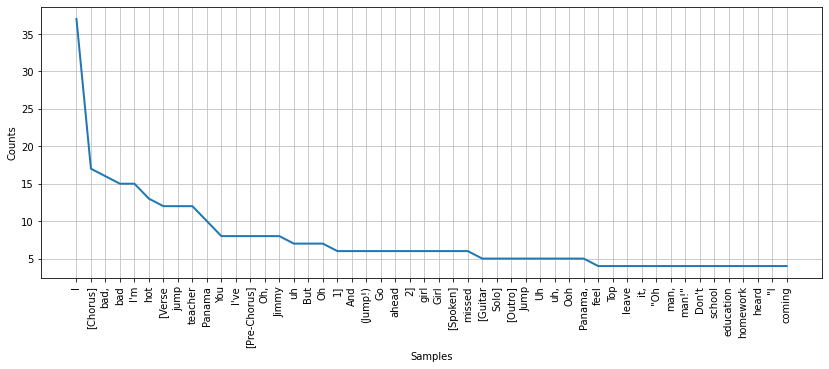

In [21]:
frequency_of_clean_album_words.plot(50,cumulative=False)

In [49]:
count_clean_album_word_list=Counter(clean_album_word_list)

In [50]:
wordcloud_1984_album=WordCloud(width=1000,height=500).generate_from_frequencies(count_clean_album_word_list)

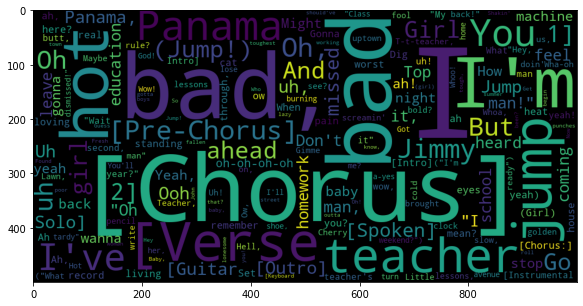

In [24]:
plt.imshow(wordcloud_1984_album)

In [51]:
clean_novel_word_list=[]

for word in novel_word_list:
  if word not in stop_words:
    clean_novel_word_list.append(word)

In [52]:
frequency_of_clean_novel_words=nltk.FreqDist(clean_novel_word_list)
frequency_of_clean_novel_words

FreqDist({'The': 669, 'He': 646, 'It': 466, 'Winston': 316, 'I': 303, 'But': 218, 'Party': 193, 'There': 184, 'In': 173, 'They': 165, ...})

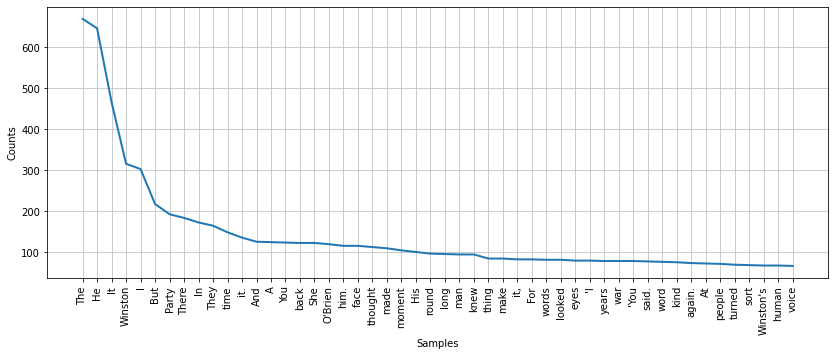

In [27]:
frequency_of_clean_novel_words.plot(50,cumulative=False)

In [54]:
count_clean_novel_word_list=Counter(clean_novel_word_list)

In [53]:
wordcloud_1984_novel=WordCloud(width=1000,height=500).generate_from_frequencies(count_clean_novel_word_list)

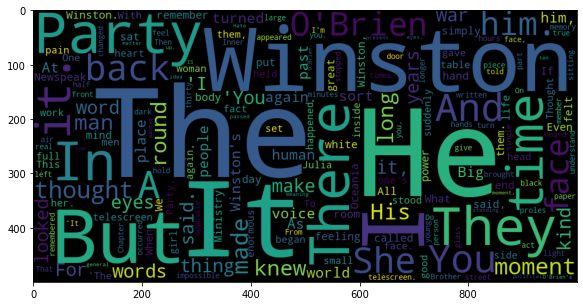

In [30]:
plt.imshow(wordcloud_1984_novel)

In [55]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
lsa=LsaSummarizer(Stemmer("english"))

In [57]:
lsa.stop_words = get_stop_words("english")
parser=PlaintextParser.from_string( " ".join(album_corpus), Tokenizer("english")) 
lsa_summary =lsa(parser.document, 10) 
lsa_summary_list=[str(sentences) for sentences in lsa_summary]
summary_album=" ".join(lsa_summary_list)

In [58]:
summary_album

"[Verse 1] I get up and nothing gets me down You got it tough, I've seen the toughest around And I know, baby, just how you feel You gotta roll with the punches to get to what's real [Verse 2] Found that girl with a lonesome John But she should've been with me Guess that woman fallen in love She don't work for free Juke-joint Jimmy is the latest thing, he's got the sound that everybody digs And the joint been jumpin' when the band been pumpin' and you know they're playing crazy gigs Well you ain't been living till you've seen the living end Top Jimmy and his Rhythm Pigs Oh, Jimmy [Verse 1] Say you're gonna leave me 'Cause I only tie you up I always loved you tender But you only like it rough Woman bound for glory Why you're leavin' me again? Dig those moves, vampire Set me loose, get it higher Throw my rope, loop-de-loop Nice white teeth, Betty Boop Set it cool, real heavy I ain't fooled, gettin' ready Oooh, aw baby Don't wanna be no uptown fool Maybe I should go to Hell, but I'm doin'

In [59]:
lsa.stop_words = get_stop_words("english")
parser=PlaintextParser.from_string( " ".join(novel_corpus), Tokenizer("english")) 
lsa_summary =lsa(parser.document, 10) 
lsa_summary_list=[str(sentences) for sentences in lsa_summary]
summary_novel=" ".join(lsa_summary_list)

In [60]:
nltk.download("vader_lexicon")
sentiment_analyzer=SentimentIntensityAnalyzer()

sentiment_analyzer.polarity_scores(" ".join(album_corpus))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.149, 'neu': 0.717, 'pos': 0.134, 'compound': -0.9937}

In [61]:
sentiment_analyzer=SentimentIntensityAnalyzer()

sentiment_analyzer.polarity_scores(" ".join(novel_corpus))

{'neg': 0.106, 'neu': 0.798, 'pos': 0.096, 'compound': -1.0}